In [236]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as color
from scipy.sparse.linalg import lsqr
from scipy.sparse import csc_matrix, lil_matrix
import cv2

%matplotlib notebook

In [476]:
img = cv2.imread("plan_sm.png", 0)
 
XX = np.linspace(0, img.shape[1], img.shape[1])
YY = np.linspace(0, img.shape[0], img.shape[0])
 
wave_no = (2 * np.pi) / (12.5 * 10**4)
 
X, Y = np.meshgrid(XX, YY)
 
 
dx = 1
dy = 1

In [477]:
source_size = 6
source_x = 20
source_y = 20
 
source = np.maximum(source_size**2-(X-source_x)**2-(Y-source_y)**2, 1)
 
# field = np.ones(X.shape)
 
permissivity = np.full(img.shape, 1)
 
for i, row in enumerate(permissivity):
    for j, elem in enumerate(row):
        if(img[i][j]) < 100:
            permissivity[i][j] = 10
 
 
plt.imshow(source, cmap='hot')
# plt.show()

In [478]:
sim_mat = np.zeros((img.size, img.size))

source_1D = np.zeros((img.shape[0]*img.shape[1], 1))
 
print(permissivity.shape)
print(sim_mat.shape)
 
for i in range(1, len(source)-1):
     
    for j in range(1,len(source[i])-1):
        M = img.shape[1]
        k = M * (i-1)
        sim_mat[k+j,k+j] = -(2/dx**2) - (2/dy**2) +((wave_no**2) / (source[i][j] **2))
        sim_mat[k+j,(k-M)+j] = permissivity[i-1][j]
        sim_mat[k+j,(k+M)+j] = permissivity[i+1][j]
        sim_mat[k+j,k+(j-i)] = permissivity[i][j-1]
        sim_mat[k+j,k+(j+1)] = permissivity[i][j+1]
        
        source_1D[k+j] = source[i][j]
         
 
print(sim_mat[30])

(113, 100)
(11300, 11300)
[0. 0. 0. ... 0. 0. 0.]


In [479]:
source = np.ravel(source)
source.transpose
print(source.shape)
print(source_1D.shape)
# field, res, rank, s = np.linalg.lstsq(sim_mat,source)
sim_mat = csc_matrix(sim_mat)
X = lsqr(sim_mat, source_1D)

(11300,)
(11300, 1)


<IPython.core.display.Javascript object>


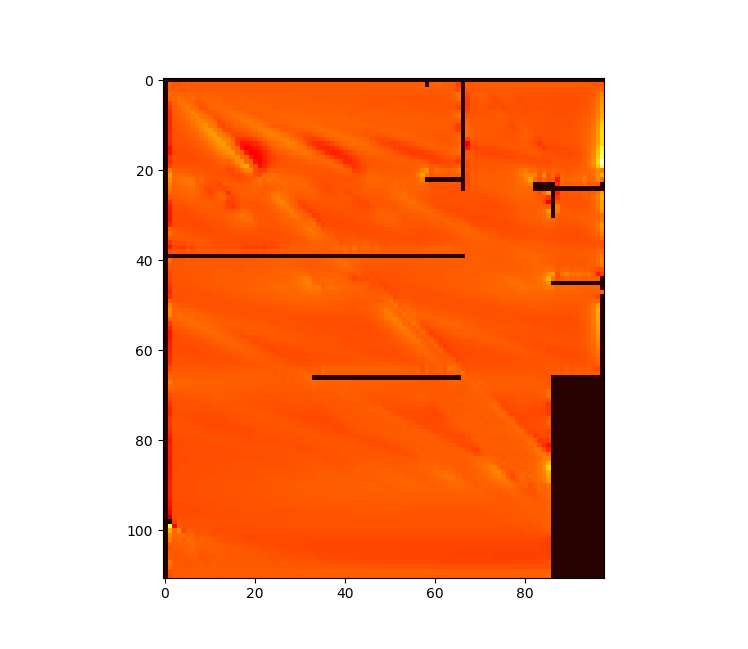

In [487]:
field = np.reshape(X[0], (img.shape[0], img.shape[1]))

for i, row in enumerate(field):
    for j, elem in enumerate(row):
        if(img[i][j]) < 100:
            field[i][j] = -100

plt.imshow(field[1:-1, 1:-1], norm=color.DivergingNorm(0.01), cmap='hot')